In [ ]:
!pip install fairlearn
!pip install lightgbm

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from lightgbm import LGBMClassifier
from fairlearn.metrics import (
    MetricFrame,
    false_positive_rate,
    true_positive_rate,
    selection_rate,
    count
)
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from fairlearn.reductions import ExponentiatedGradient, DemographicParity
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None)

In [99]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [100]:
 # add headers to the data frames
headers = {0 : "age",
               1 : "sex",
               2 : "chest_pain_type",
               3 : "trestbps",
               4 : "chol",
               5 : "fasting_blood_sugar",
               6 : "rest_ecg",
               7 : "thalach",
               8 : "exercise_induced_angina",
               9 : "oldpeak",
               10 : "slope",
               11 : "vessels_colored_by_flourosopy",
               12 : "thalassemia",
               13 : "diagnosis"}
df = df.rename(columns=headers)


In [101]:
df["sex"].replace({1.0: "Male", 0.0: "Female"},inplace=True)

In [102]:
df["target"]=df["diagnosis"].apply(lambda x: 0 if x == 0  else 1)
df.drop(columns="diagnosis",inplace=True)

In [103]:
df["target"].value_counts()

0    164
1    139
Name: target, dtype: int64

In [104]:
#One-Hot Encode the categorical features
df = pd.get_dummies(df, columns = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg','exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia'],drop_first = True )

In [105]:
X=df.drop('target', axis = 1)
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y , train_size = 0.7, random_state = 42,stratify = df['target'] )

In [106]:
clf = LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [107]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_Male,chest_pain_type_2.0,chest_pain_type_3.0,chest_pain_type_4.0,fasting_blood_sugar_1.0,...,exercise_induced_angina_1.0,slope_2.0,slope_3.0,vessels_colored_by_flourosopy_1.0,vessels_colored_by_flourosopy_2.0,vessels_colored_by_flourosopy_3.0,vessels_colored_by_flourosopy_?,thalassemia_6.0,thalassemia_7.0,thalassemia_?
230,52.0,136.0,196.0,169.0,0.1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
43,59.0,150.0,212.0,157.0,1.6,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
283,35.0,122.0,192.0,174.0,0.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,58.0,128.0,259.0,130.0,3.0,1,0,0,1,0,...,1,1,0,0,1,0,0,0,1,0
42,71.0,160.0,302.0,162.0,0.4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,71.0,110.0,265.0,130.0,0.0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
173,62.0,140.0,394.0,157.0,1.2,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
55,54.0,124.0,266.0,109.0,2.2,1,0,0,1,0,...,1,1,0,1,0,0,0,0,1,0
91,62.0,160.0,164.0,145.0,6.2,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [108]:
sensitive_feat = X_test['sex_Male']


In [109]:
y_pred = clf.predict(X_test)
y_pred_proba=clf.predict_proba(X_test)


In [110]:
gm = MetricFrame(metrics=recall_score, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_feat)
print(gm.by_group)


sex_Male
0    0.727273
1    0.709677
Name: recall_score, dtype: float64


We could also look at another metric, such as selection rate (the percentage of the population with ‘1’ as their label).



In [111]:
sr = MetricFrame(metrics=selection_rate, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_feat)
sr.by_group

sex_Male
0    0.322581
1    0.483333
Name: selection_rate, dtype: float64

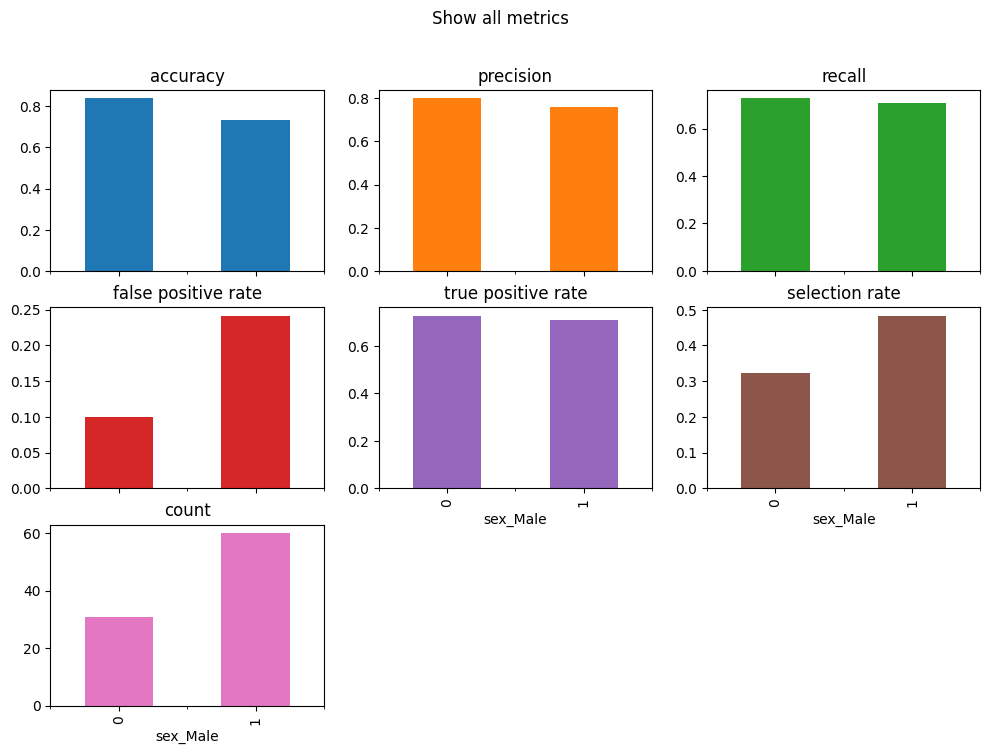

In [112]:
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'false positive rate': false_positive_rate,
    'true positive rate': true_positive_rate,
    'selection rate': selection_rate,
    'count': count}
metric_frame = MetricFrame(metrics=metrics,
                           y_true=y_test,
                           y_pred=y_pred,
                           sensitive_features=sensitive_feat)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
);

From the plot above, we can see that various metrics are slightly biased.

## Demographic Parity
It asserts that average of algorithmic decisions should be similar across different groups: p(ˆy=1|z=0) / p(ˆy=1|z=1) ≥ τ , where τ is a given threshold, usually set as 0.8

Note z = 0 => minority group, z = 1 => majority group.

In [113]:
male_indices = X[X['sex_Male'] == 1].index.values
female_indices = X[X['sex_Male'] == 0].index.values
male_indices_test = X_test[X_test['sex_Male'] == 1].index.values
female_indices_test = X_test[X_test['sex_Male'] == 0].index.values

In [114]:
y_male_test = y[male_indices_test]
y_female_test = y[female_indices_test]

y_male = y[male_indices]
y_female = y[female_indices]

In [125]:
y_pred_proba=clf.predict_proba(X)
y_pred = clf.predict(X)

y_pred_male = y_pred[male_indices]
y_pred_female = y_pred[female_indices]
y_pred_male_test = y_pred[male_indices_test]
y_pred_female_test = y_pred[female_indices_test]

y_pred_proba_male_test = y_pred_proba[male_indices_test, :]
y_pred_proba_female_test = y_pred_proba[female_indices_test, :]


In [126]:
dem_par_gender_ratio = np.mean(y_pred_proba_female_test[:, 1]) / np.mean(y_pred_proba_male_test[:, 1])
dem_par_gender_ratio

0.6485006680332009

In [127]:
def plot_bar(values, labels, ax, color='b'):
    bar_width = 0.35
    opacity = 0.9
    index = np.arange(len(values))
    
    ax.bar(index, values, bar_width,
           alpha=opacity,
           color=color)
    ax.set_xticks(index)
    ax.set_xticklabels(labels)
    ax.grid(True);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


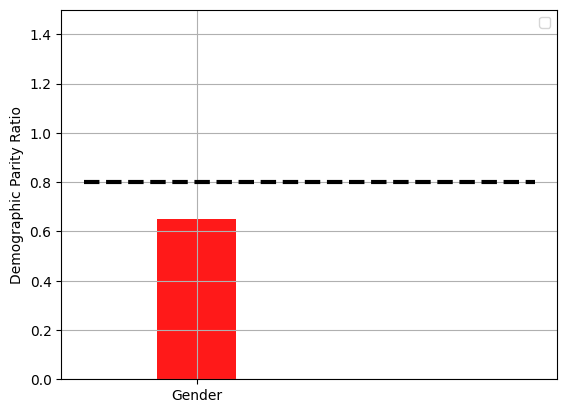

In [128]:
threshold_1 = 0.8
f, ax = plt.subplots()
plot_bar([dem_par_gender_ratio], 
         ['Gender'], 
         ax=ax, color='r')
ax.set_ylabel('Demographic Parity Ratio')
ax.set_ylim([0, 1.5])
ax.plot([-0.5, 1.5], 
        [threshold_1, threshold_1], "k--", 
        linewidth=3.0)
ax.legend();
plt.show()

## Equality of Opportunity / Odds  
It is defined as: p(ˆy = 1|z = 0, y = 1) − p(ˆy = 1|z = 1, y = 1), where y is the ground truth label. Essentially this is comparing the true positive rate across different groups.  
A symmetric measurement can be calculated for false positive rate: p(ˆy = 1|z = 0, y = 0) − p(ˆy = 1|z = 1, y = 0).  
Putting them together will result the Equality of Odds metric.

In [129]:
def compute_tpr_fpr(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    TPR = 1. * TP / (TP + FN) 
    FPR = 1. * FP / (FP + TN)
    
    return TPR, FPR

In [130]:
tpr_female, fpr_female = compute_tpr_fpr(y_female_test, 
                                         y_pred_female_test)
tpr_male, fpr_male = compute_tpr_fpr(y_male_test, 
                                     y_pred_male_test)

In [131]:
def plot_scatter(values, label, xticklabels,
                 ax, color='b', marker='*',
                 xoffsets=[0.3, -0.3], 
                 yoffsets=[0.1, 0.1]):
    opacity = 0.9
    index = np.arange(len(values))
    
    sc = ax.scatter(index, values,
                    alpha=opacity,
                    marker=marker,
                    color=color)
    ax.set_xticks(index)
    ax.set_xticklabels(xticklabels)
    ax.grid(True);
    
    headwidth=8
    width=2
    size=14
    facecolor='black'
    for i, value in enumerate(values):
        ax.annotate(label, 
                    xy=(i, value),  
                    xytext=(i+xoffsets[i], value+yoffsets[i]), 
                    arrowprops=dict(facecolor=facecolor, shrink=0.05, 
                                    headwidth=headwidth, width=width),
                    horizontalalignment='right', verticalalignment='top',
                    size=size)
    return sc

In [132]:

from sklearn.metrics import roc_curve, auc
def compute_roc_auc(y_test, y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in [1]:
        fpr[i], tpr[i], _ = roc_curve(y_test, 
                                      y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr, tpr, roc_auc

In [133]:

fpr_male, tpr_male, roc_auc_male = compute_roc_auc(y_male_test, 
                                                   y_pred_proba_male_test)
fpr_female, tpr_female, roc_auc_female = compute_roc_auc(y_female_test, 
                                                         y_pred_proba_female_test)

Text(0.5, 1.0, 'ROC Curve (Gender)')

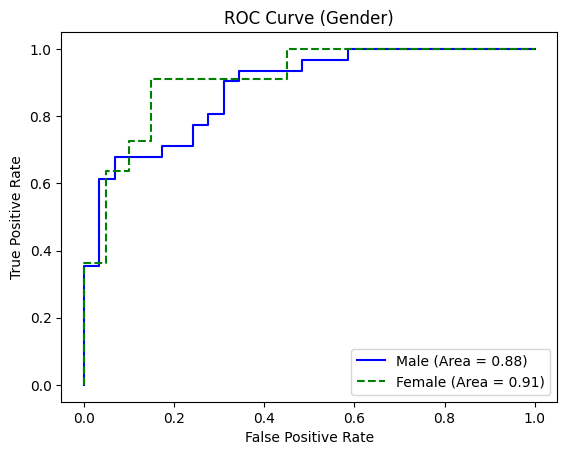

In [138]:
lw = 1.5
f, ax = plt.subplots()
ax.plot(fpr_male[1], tpr_male[1], 
        linestyle='-', color='b',
        lw=lw, 
        label='Male (Area = %0.2f)' % roc_auc_male[1])
ax.plot(fpr_female[1], tpr_female[1], 
        linestyle='--', color='g',
        lw=lw, 
        label='Female (Area = %0.2f)' % roc_auc_female[1])
ax.legend()

ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
ax.set_title('ROC Curve (Gender)')


## Predictive Quality Parity

In [140]:
from sklearn.metrics import accuracy_score, f1_score


In [141]:
acc_male = accuracy_score(y_male_test, y_pred_male_test)
acc_female = accuracy_score(y_female_test, y_pred_female_test)

f1_male = f1_score(y_male_test, y_pred_male_test)
f1_female = f1_score(y_female_test, y_pred_female_test)


Text(0.5, 1.0, 'Gender')

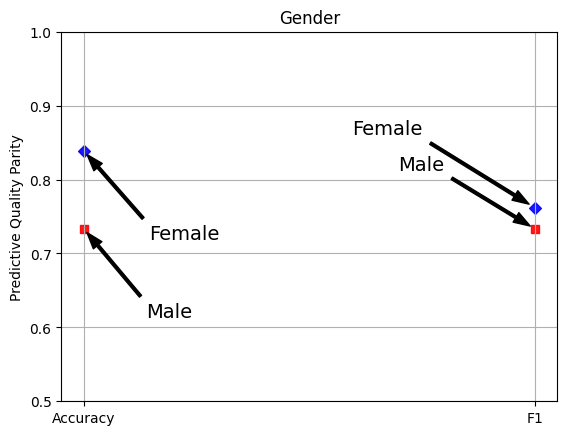

In [143]:
f, ax = plt.subplots()
male_sc = plot_scatter([acc_male, f1_male],
                       'Male',
                       ax=ax,
                       xticklabels=['Accuracy', 'F1'],
                       marker='s',
                       color='r',
                       xoffsets=[0.24, -0.2],
                       yoffsets=[-0.1, 0.1])
female_sc = plot_scatter([acc_female, f1_female],
                         'Female',
                         ax=ax,
                         xticklabels=['Accuracy', 'F1'],
                         marker='D',
                         color='b',
                         xoffsets=[0.3, -0.25],
                         yoffsets=[-0.1, 0.12])
ax.set_ylabel('Predictive Quality Parity');
ax.set_ylim([0.5, 1.0])

ax.set_title('Gender')


## Train a fairer model (?)

In [134]:
np.random.seed(42)
constraint = DemographicParity()
clf_fair = LGBMClassifier()
mitigator = ExponentiatedGradient(clf_fair, constraint)
sensitive_feat = X_train['sex_Male']
mitigator.fit(X_train, y_train, sensitive_features=sensitive_feat)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x2a0761ab0>,
                      estimator=LGBMClassifier(), nu=0.0)

In [135]:
sensitive_feat = X_test['sex_Male']
y_pred_mitigated = mitigator.predict(X_test)
sr_mitigated = MetricFrame(metrics=selection_rate, y_true=y_test, y_pred=y_pred_mitigated, sensitive_features=sensitive_feat)
print(sr_mitigated.by_group)

sex_Male
0    0.645161
1    0.500000
Name: selection_rate, dtype: float64
